

Obtener promedios por mes de cada estado

Graficar promedios por estado con  los meses dinamicos

mostrar mapa 
mostrar grafica de barras con promedio por día del del y estado elegido

Librerias  lo estoy corriendo en python 3.7.4 64bit ('base':conda)
Puebas de Dashboard Mx como note book

In [112]:
from os import listdir
import pandas as pd
from datetime import datetime
from contextlib import contextmanager


import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import geopandas as gpd

import numpy as np
import json
from datetime import date

from prettytable import PrettyTable

In [194]:
ruta = 'meteoblue'
def ls(ruta ):
    return listdir(ruta)

archivos=ls(ruta)
print(archivos)

['San_Luis_Potosí.csv', '.~lock.historico.csv#', 'Michoacán.csv', 'Chiapas.csv', 'Coahuila.csv', 'San_Luis_Potosí_ggc.csv', 'Durango.csv', 'Chihuahua.csv', '.~lock.historico2.csv#', 'Morelos.csv', 'Sinaloa.csv', 'Baja_California.csv', 'Queretaro.csv', 'Sonora.csv', '.~lock.Coahuila.csv#', '.~lock.historico3.csv#', 'Jalisco.csv', 'Tabasco.csv', 'Campeche.csv', 'Hidalgo.csv', 'Nayarit.csv', 'Guerrero.csv', 'Veracruz.csv', 'Tlaxcala.csv', 'Baja_California_Sur.csv', 'Puebla.csv', 'Aguascalientes.csv', 'Zacatecas.csv', 'Guanajuato.csv', 'Yucatan.csv', 'historico.csv', 'Quintana_Roo.csv', 'Colima.csv']


In [195]:
#varios archivos https://stackoverflow.com/questions/62102665/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe-where-1
arch_entidad=ruta + "/Chiapas.csv" #algunos archivos no abre (colima)

df=pd.read_csv(arch_entidad,usecols = [1,2],skiprows = 0,sep=',',parse_dates = [1], dayfirst = True ,encoding='utf-8-sig')
df.columns = ['Fecha','Velocidad']

print(df.head())



                 Fecha  Velocidad
0  2020-04-14 00:00:00  4.5820518
1  2020-04-14 01:00:00  3.9763298
2  2020-04-14 02:00:00        3.6
3  2020-04-14 03:00:00  3.0758414
4  2020-04-14 04:00:00  2.8799999


In [196]:
#df['Anio'] = pd.to_datetime(df['Fecha']).dt.to_period('Y')

df['anio'] = pd.DatetimeIndex(df['Fecha']).year
df['mes'] = pd.DatetimeIndex(df['Fecha']).month
df['dia'] = pd.DatetimeIndex(df['Fecha']).day
df['Velocidad'] = df['Velocidad'].astype(float)

df=df.drop(['Fecha'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Velocidad  753 non-null    float64
 1   anio       753 non-null    int64  
 2   mes        753 non-null    int64  
 3   dia        753 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 23.7 KB


In [197]:
entidad='Chiapas'

df= df[(df['Velocidad']>0)]

#df=df.groupby(['anio','mes','dia']).Velocidad.mean()
#df=df.groupby('Velocidad').mean().sort_values(by='dia')
#df.to_csv(ruta + "/historico2.csv",header=True,sep=',') #provicional

df=df.groupby('dia').mean()

df['entidad'] = entidad
print(df)

     Velocidad  anio  mes  entidad
dia                               
1    14.507049  2020    5  Chiapas
2     7.843983  2020    5  Chiapas
3     3.721802  2020    5  Chiapas
5     5.818573  2020    5  Chiapas
6     6.290276  2020    5  Chiapas
7    14.804053  2020    5  Chiapas
8     7.442974  2020    5  Chiapas
9     7.470898  2020    5  Chiapas
10   19.645939  2020    5  Chiapas
11   20.639986  2020    5  Chiapas
12   10.349302  2020    5  Chiapas
14    7.177914  2020    4  Chiapas
15    7.312927  2020    4  Chiapas
16    6.117541  2020    4  Chiapas
17    7.939538  2020    4  Chiapas
18    8.329114  2020    4  Chiapas
19    6.648889  2020    4  Chiapas
20    5.875791  2020    4  Chiapas
21    8.212371  2020    4  Chiapas
22    7.849332  2020    4  Chiapas
23    7.783284  2020    4  Chiapas
24    8.100840  2020    4  Chiapas
25    7.725299  2020    4  Chiapas
26    6.337705  2020    4  Chiapas
27   10.861607  2020    4  Chiapas
28    6.749836  2020    4  Chiapas
29    8.879143  2020

carga csv,  quita columnas sin uso, quita duplicados y filta los invalidos (en pruebas)

Generar archivo consolidado del registro del promedio por día mes y entidad

In [198]:
# crea el archivo
archivo=ruta + "/historico.csv"
#df.to_csv(archivo, sep=',', encoding='utf-8-sig',header= True)
          
      
          
          
          

In [199]:

#import pandas as pd
@contextmanager
def open_file(archivo, mode):
        file_to=open(archivo,mode)
        yield file_to
        file_to.close()


with open_file(archivo,'r') as infile:
         df.to_csv(archivo,mode='a',header=False,sep=',')  
        

Abrir archivo historico para sacar pomedios por mes y generar mapa

In [200]:
dfmap=pd.read_csv(archivo,skiprows = 0,sep=',',encoding='utf-8-sig')
dfmap= dfmap.drop_duplicates()

#ejemplo df2 = df.groupby(('turno', 'CategoriaTM','CausaTM')).duracionTM.sum()
#dfmap=dfmap.groupby(['dia']).mean()
dfmap=dfmap.groupby(['entidad','mes','Velocidad']).mean()
print(dfmap)



                        dia  anio
entidad  mes Velocidad           
Chiapas  4   5.875791    20  2020
             6.117541    16  2020
             6.337705    26  2020
             6.648889    19  2020
             6.749836    28  2020
             7.177914    14  2020
             7.312927    15  2020
             7.725299    25  2020
             7.783284    23  2020
             7.849332    22  2020
             7.939538    17  2020
             8.100840    24  2020
             8.212371    21  2020
             8.329114    18  2020
             8.426717    30  2020
             8.879143    29  2020
             10.861607   27  2020
         5   3.721802     3  2020
             5.818573     5  2020
             6.290276     6  2020
             7.442974     8  2020
             7.470898     9  2020
             7.843983     2  2020
             10.349302   12  2020
             14.507049    1  2020
             14.804053    7  2020
             19.645939   10  2020
             2

Visualización Gráfica

In [211]:
# # read the state wise shapefile of India in a GeoDataFrame and preview it
# # map_data = gpd.read_file('Indian_States.shp')
map_data = gpd.read_file('mx.shp')
print("leido")
map_data.rename(columns = {'NOM_ENT':'entidad'}, inplace = True)
print(map_data) # yo lo agreggue


  CVE_ENT                      NOM_ENT  \
0      01  Andaman and Nicobar Islands   

                                            geometry  
0  POLYGON ((2470517.824 1155028.588, 2470552.248...  
leido
   CVE_ENT                      entidad  \
0       01  Andaman and Nicobar Islands   
1       02               Andhra Pradesh   
2       03            Arunachal Pradesh   
3       04                        Assam   
4       05                        Bihar   
5       06                   Chandigarh   
6       07                 Chhattisgarh   
7       08                        Delhi   
8       09                          Goa   
9       10                      Gujarat   
10      11                      Haryana   
11      12             Himachal Pradesh   
12      13            Jammu and Kashmir   
13      14                    Jharkhand   
14      15                    Karnataka   
15      16                       Kerala   
16      17                       Ladakh   
17      18               

In [207]:
# # merge both the dataframes - state_data and map_data
#Ejemplo https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
#df1.merge(df2, left_on='lkey', right_on='rkey')
merged_data = pd.merge(map_data, dfmap, how = 'left', on = 'entidad')
merged_data.fillna(0, inplace = True)
#merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data

,CVE_ENT,entidad,geometry,dia,anio
0,01,Andaman and Nicobar Islands,"POLYGON ((2470517.824 1155028.588, 2470552.248...",0.0,0.0
1,02,Andhra Pradesh,"MULTIPOLYGON (((1073966.633 2349614.872, 10740...",0.0,0.0
2,03,Arunachal Pradesh,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",0.0,0.0
3,04,Assam,"MULTIPOLYGON (((3702830.927 1030965.604, 37034...",0.0,0.0
4,05,Bihar,"POLYGON ((2469954.193 1978522.993, 2469982.807...",0.0,0.0
5,06,Chandigarh,"MULTIPOLYGON (((1157633.318 768573.525, 115772...",0.0,0.0
6,07,Chhattisgarh,"POLYGON ((3560747.319 695090.732, 3561146.749 ...",0.0,0.0
7,08,Delhi,"POLYGON ((1961651.184 2201097.236, 1961978.967...",0.0,0.0
8,09,Goa,"POLYGON ((2804412.023 837658.472, 2804420.322 ...",0.0,0.0
9,10,Gujarat,"POLYGON ((2107050.444 1641943.399, 2109767.527...",0.0,0.0


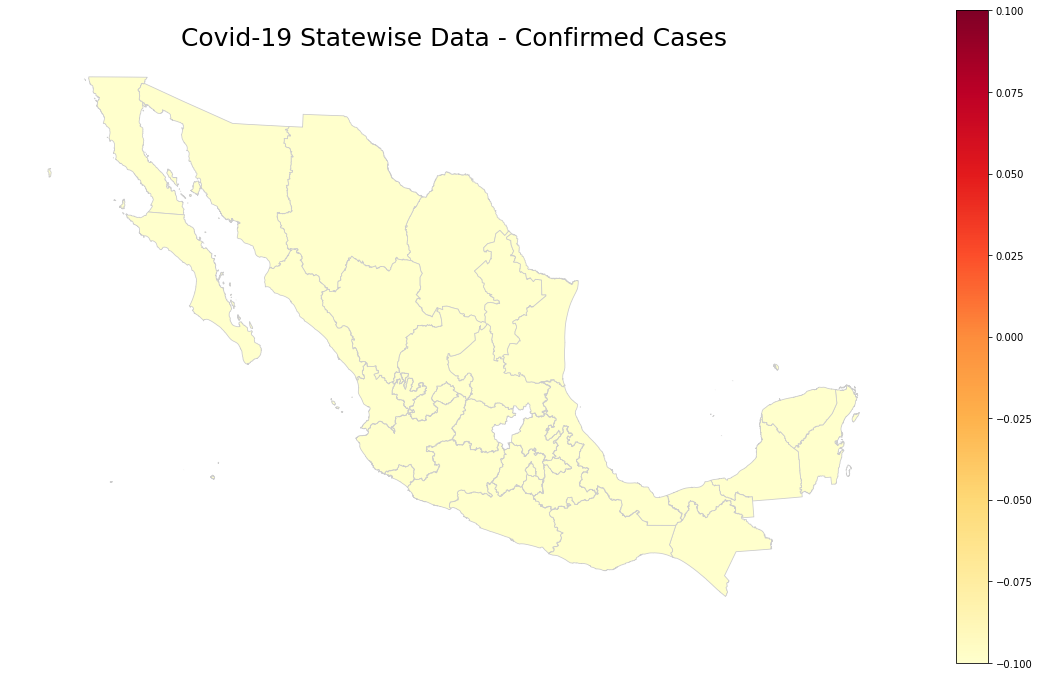

In [209]:
# # create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
# # plot the figure
merged_data.plot(column = 'dia', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.show()

******Proceso anterior

In [8]:

df=pd.read_csv('tamaulipas_origen.csv',  skiprows = 9,sep=',')
df=df.drop(['Nueva Baja California Temperature [2 m elevation corrected]','Nueva Baja California Precipitation Total','Nueva Baja California Wind Direction [10 m]'], axis=1)
#Renombre valirables
df.rename(columns = {'timestamp':'Fecha','Nueva Baja California Wind Speed [10 m]':'Velocidad'}, inplace = True)

df= df.drop_duplicates()
print(df)



             Fecha  Velocidad  Mes
0    20200410T0000   4.802594    4
1    20200410T0100   4.536629    4
2    20200410T0200   3.240896    0
3    20200410T0300   2.978442    4
4    20200410T0400   2.978442    4
..             ...        ...  ...
187  20200417T1900  11.769937    5
188  20200417T2000   9.623642    5
189  20200417T2100   8.541434    5
190  20200417T2200   7.766828    5
191  20200417T2300   6.946862    5

[192 rows x 3 columns]


#Generamos tabla de SubTotales de promedios
# converting the 'string' data to 'int' y 'string' data to 'int'

In [7]:

df['Mes'] = df['Mes'].map(int)
df['Velocidad'] = df['Velocidad'].map(float) 

# elige solo las columnas a utilizar y filtra valores válidos
dfgr1 = df[['Mes','Velocidad']]
dfgr1= dfgr1[(dfgr1['Mes'] >0) & (dfgr1['Velocidad']>0 )] 

# Tabla resumen
print(dfgr1)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
dfgr1=dfgr1.groupby(['Mes']).mean()

print(dfgr1)

     Mes  Velocidad
0      4   4.802594
1      4   4.536629
3      4   2.978442
4      4   2.978442
5      4   4.409705
..   ...        ...
187    5  11.769937
188    5   9.623642
189    5   8.541434
190    5   7.766828
191    5   6.946862

[186 rows x 2 columns]
     Velocidad
Mes           
4     9.218575
5     7.388040


Pretty table par mejorar la vista en pantalla

In [8]:
def tablaPretty(dfgr1):
    table = PrettyTable(list(dfgr1.columns))
    for row in dfgr1.itertuples():
        table.add_row(row[1:])
    return str(table)

#print(tablaPretty(dfgr1))

TPBarras=tablaPretty(dfgr1)

print(TPBarras)

+-------------------+
|     Velocidad     |
+-------------------+
| 9.218575002564107 |
| 7.388040325555558 |
+-------------------+


aplica estilo de la Grafica de barras horizontales

['abril', 'mayo']


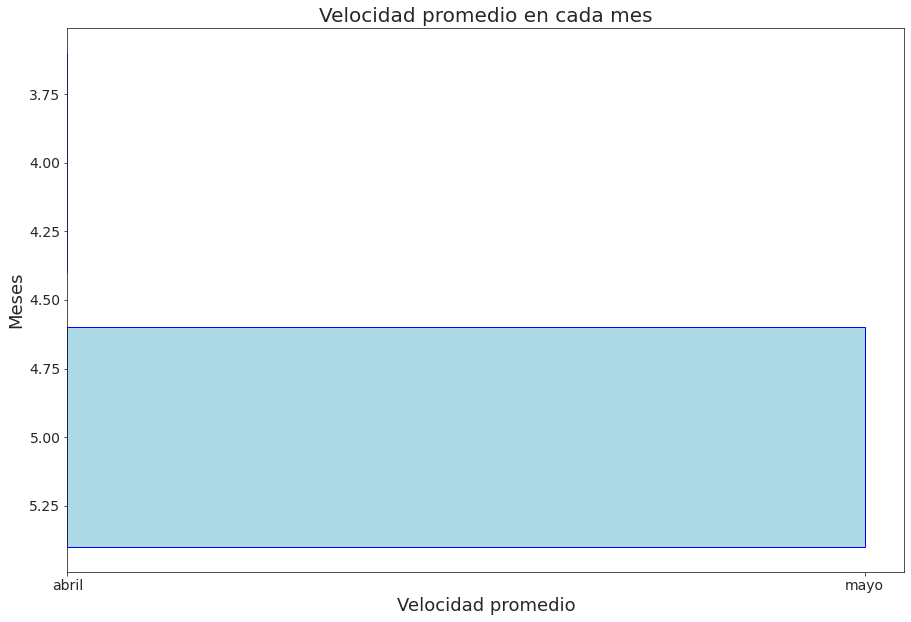

In [10]:
sns.set_style("ticks")
y=[4,5]
x=["abril","mayo"]

print(x)

plt.figure(figsize = (15,10))
#plt.barh([4, 5], TPBarras["Velocidad"].map(float), align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.barh(y, x, align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('Velocidad promedio', fontsize = 18)
plt.ylabel('Meses', fontsize = 18)
plt.gca().invert_yaxis() # this is to maintain the order in which the states appear
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)
plt.title('Velocidad promedio en cada mes', fontsize = 20)
plt.show()